# [TEMPLATE] DATASET DEPURADO

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [253]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
#df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [254]:
# Colores a utilizar

amarillo = '#FCAA67'
rojo = '#B0413E'
verde = '#FFFFC7'
azul = '#548687'
marron = '#473335'

<hr>

# Distribucion del precio del metro cuadrado

In [255]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [256]:
#Nos quedamos con las columnas que nos interesan.
df = df[['fecha', 'tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'metroscubiertos', 'metrostotales', 'precio']]

In [257]:
# Para calcular el precio por metro cuadrado necesitamos que los datos de metros totales sean coherente
# y no sean nulos:

In [258]:
(df['metrostotales'] != -1).value_counts()

True     188533
False     51467
Name: metrostotales, dtype: int64

In [259]:
(df['metroscubiertos'] != -1).value_counts()

True     222600
False     17400
Name: metroscubiertos, dtype: int64

In [260]:
# Vemos que tenemos un gran indice de valores nulos en cuanto a metros totales, esto puede deberse a que
# muchas publicaciones tienen la cantidad de metros totales en donde deberian ir los cubiertos.

In [261]:
df = df.loc[(df['metroscubiertos'] != -1) & (df['metrostotales'] != -1)]

In [262]:
df.loc[(df['metroscubiertos'] > df['metrostotales'])]

,fecha,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,metroscubiertos,metrostotales,precio
1,2013-06-28 00:00:00,Casa en condominio,La Magdalena Contreras,Distrito Federal,10,3,268,180,3600000
12,2013-08-12 00:00:00,Casa,Querétaro,Querétaro,0,3,170,141,1500000
13,2015-03-31 00:00:00,Casa,Benito Juárez,Distrito Federal,20,-1,227,185,3000000
14,2014-11-25 00:00:00,Casa,Zapopan,Jalisco,-1,-1,250,231,5300000
21,2016-02-01 00:00:00,Casa en condominio,Querétaro,Querétaro,-1,3,181,150,2300000
...,...,...,...,...,...,...,...,...,...
239979,2016-03-04 00:00:00,Casa,Miguel Hidalgo,Distrito Federal,10,3,198,122,3300000
239983,2016-02-09 00:00:00,Casa,San Luis Potosí,San luis Potosí,-1,3,119,59,684338
239985,2016-12-07 00:00:00,Casa en condominio,Atizapán de Zaragoza,Edo. de México,10,3,145,87,2700000
239994,2013-07-31 00:00:00,Casa,Zapopan,Jalisco,3,2,160,90,1350000


In [263]:
# Como vemos, tenemos muchisimos datos en lo que los metros cubiertos son mayores a los totales, cosa que 
# no tiene ningun sentido. Lamentablemente, para no tomar ninguna hipotesis erronea, deberemos eliminarlos y
# trabajar con los datos cargados correctamente.

In [264]:
df = df.loc[(df['metroscubiertos'] <=df['metrostotales'])]

In [265]:
df.shape

(100838, 9)

In [266]:
mt = 'precio metro cuadrado'
mtp = 'precio promedio metro cuadrado'
df[mt] = (df['precio'])/(df['metrostotales'])

In [267]:
df

,fecha,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,metroscubiertos,metrostotales,precio,precio metro cuadrado
0,2015-08-23 00:00:00,Apartamento,Benito Juárez,Distrito Federal,-1,2,80,80,2273000,28412.500000
2,2015-10-17 00:00:00,Casa,Tonalá,Jalisco,5,3,144,166,1200000,7228.915663
3,2012-03-09 00:00:00,Casa,Zinacantepec,Edo. de México,1,2,63,67,650000,9701.492537
4,2016-06-07 00:00:00,Apartamento,Zapopan,Jalisco,10,2,95,95,1150000,12105.263158
5,2014-03-18 00:00:00,Apartamento,Coyoacán,Distrito Federal,5,2,75,90,1100000,12222.222222
...,...,...,...,...,...,...,...,...,...,...
239991,2015-03-14 00:00:00,Apartamento,Iztacalco,Distrito Federal,20,2,68,68,1450000,21323.529412
239992,2015-11-23 00:00:00,Casa en condominio,Huixquilucan,Edo. de México,10,3,270,293,5500000,18771.331058
239993,2015-03-22 00:00:00,Casa,Zapopan,Jalisco,1,3,150,150,1650000,11000.000000
239996,2014-07-10 00:00:00,Casa,Toluca,Edo. de México,0,3,200,250,1940000,7760.000000


In [268]:
#Ahora ya podemos calcular algunos parametros de interes:

# Precio promedio del metro cuadrado en Mexico

In [306]:
prom = df[mt].mean()

In [307]:
print(prom)

12990.601495203458


# Inflacion en Mexico

##### Funcion auxiliar

In [308]:
def parser_fecha(fecha):
    anio=fecha[0:4]
    mes=fecha[5:7]
    
    meses={'01':'Ene. ', '02':'Feb. ', 
          '03':'Mar. ', '04':'Abr. ', 
          '05':'May. ', '06':'Jun. ', 
          '07':'Jul. ', '08':'Ago. ', 
          '09':'Sep. ', '10':'Oct. ', 
          '11':'Nov. ', '12':'Dic. ', }
    nuevafecha = ""
    
    nuevafecha+= meses[mes]+anio
    
    return nuevafecha

#### Codigo

In [309]:
f = df.copy()
f = f[['fecha', 'tipodepropiedad', mt]]

In [310]:
f['fecha'] = f['fecha'].map(lambda x: x[0:7])

In [311]:
f.sort_values(by='fecha', inplace=True)

In [312]:
gral =f.groupby(['fecha'])[mt].agg(['mean']).rename(columns={'mean':'precio promedio metro cuadrado'})

#casas = f.loc[f['tipodepropiedad'] == 'Casa'].groupby(['fecha'])[mt].agg(['mean'])\
        #.rename(columns={'mean':'precio promedio metro cuadrado'})

#part = f.loc[f['tipodepropiedad'] == 'Apartamento'].groupby(['fecha'])[mt].agg(['mean'])\
        #.rename(columns={'mean':'precio promedio metro cuadrado'})

In [313]:
gral.head()

,precio promedio metro cuadrado
fecha,
2012-01,7337.107779
2012-02,7102.120140
2012-03,7539.155765
2012-04,7674.691732
2012-05,7636.666343


In [314]:
gral.index = gral.index.map(parser_fecha)

In [315]:
gral.head()

,precio promedio metro cuadrado
fecha,
Ene. 2012,7337.107779
Feb. 2012,7102.120140
Mar. 2012,7539.155765
Abr. 2012,7674.691732
May. 2012,7636.666343


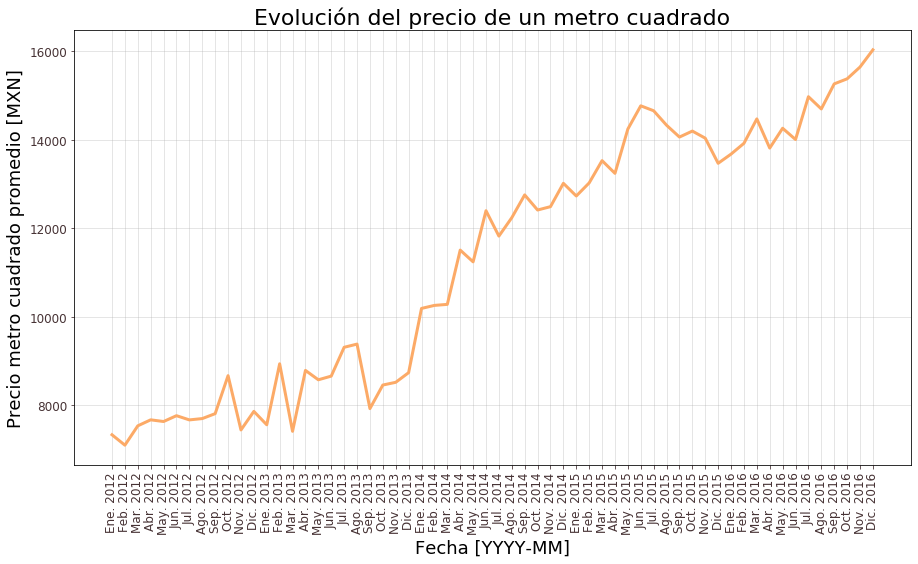

In [316]:
#config
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(15,8))

#plot
plt.plot(gral, linewidth=3, color=amarillo)
#plt.plot(casas, linewidth=3, color=rojo)
#plt.plot(apart, linewidth=3, color=azul)

#labels y titulos
plt.xlabel("Fecha [YYYY-MM]", fontsize=18)
plt.ylabel("Precio metro cuadrado promedio [MXN]", fontsize=18)
plt.title("Evolución del precio de un metro cuadrado", fontsize=22)
plt.grid(True)
plt.tick_params(colors=marron, grid_alpha=0.4, labelsize=12)
plt.xticks(rotation=90)

#save
plt.savefig("inflacion mexico.png", transparent=True, bbox_inches='tight')
